In [1]:
import time
import numpy as np
import pandas as pd
import ringity as rng
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter
from collections import defaultdict
from ringity.generators.utils.param_utils import rate_to_beta, beta_to_rate

## Model parameters

In [2]:
N = 2**9

config_dict = {
    
# MADE IT TO FIGURE
    'default' : {
        'c' : 1,
        'r' : 0.25,
        'beta' : 1,
        'rho' : None,
    },
    'longerResponse' : {
        'c' : 1,
        'r' : 0.375,
        'beta' : 1,
        'rho' : None,
    },
    'weakerInteraction' : {
        'c' : 0.1,
        'r' : 0.25,
        'beta' : 1,
        'rho' : None,
    },
    'shorterDelay' : {
        'c' : 1,
        'r' : 0.25,
        'beta' : 0.75,
        'rho' : None,
    },
    'constantDensity' : {
        'c' : None,
        'r' : 0.375,
        'beta' : 1,
        'rho' : 0.025,
    },
    'shorterResponse' : {
        'c' : 1,
        'r' : 0.125,
        'beta' : 1,
        'rho' : None,
    },
    'evenLongerResponse' : {
        'c' : 1,
        'r' : 0.75,
        'beta' : 1,
        'rho' : None,
    },
    'evenShorterDelay' : {
        'c' : 1,
        'r' : 0.25,
        'beta' : 0.5,
        'rho' : None,
    },
    'random' : {
        'c' : np.random.uniform(),
        'r' : np.random.uniform(),
        'beta' : np.random.uniform(),
        'rho' : None,
    },
    'random_rho' : {
        'c' : np.random.uniform(),
        'r' : None,
        'beta' : np.random.uniform(),
        'rho' : np.random.uniform(),
    }
}

## Default model

In [3]:
configuration = 'longerResponse'

kwargs = config_dict[configuration]

In [4]:
G, pos, builder = rng.network_model(
                                N = N,
                                return_positions = True, 
                                return_builder = True,
                                verbose = True,
                                **kwargs)

Response parameter was set  to: r = 0.375
Rate parameter was set to:   rate = 0.0
Coupling parameter was set to:  c = 1
Density parameter was set to: rho = 0.375
Uniform (beta = 1) model detected.


In [5]:
rho_obs = nx.density(G)
rho_exp = builder.density
score = rng.ring_score(G)

In [6]:
print(f"rho_obs = {rho_obs:.3f}")
print(f"rho_exp = {rho_exp:.3f}")
print(f"score   = {score:.3f}")

rho_obs = 0.375
rho_exp = 0.375
score   = 0.976


In [7]:
circ_layout = {n:(np.cos(t), np.sin(t)) for n,t in enumerate(pos)}
spring_layout = nx.spring_layout(G)

In [8]:
c = builder.coupling
r = builder.response
rho = builder.density
beta = rate_to_beta(builder.rate)

## Interaction function

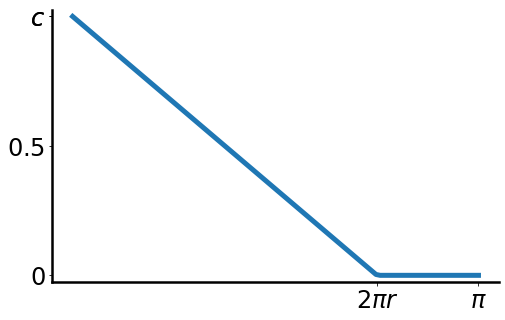

In [9]:
x = np.linspace(0, np.pi, 100)
y = c*(1-x/(2*np.pi*r)).clip(0)

fig_func, ax = plt.subplots(figsize = (8,5))

ax.plot(x, y, linewidth = 5)


plt.xticks([2*np.pi*r, np.pi], [r'$2\pi r$', r'$\pi$'])
plt.yticks([0, 0.5, 1, c], [r'$0$', r'$0.5$', r'$1$', r'$c$'])

ax.set_ylim(-0.025, 1.025)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

rng.ax_setup(ax)

## Network visualization

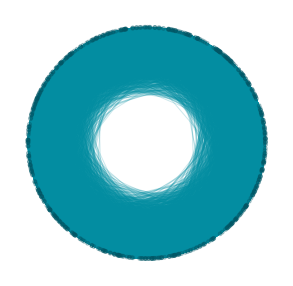

In [10]:
netviz_circ_fig, ax = plt.subplots(figsize = (5,5))

ax.set_xlim(-1.175,1.175)
ax.set_ylim(-1.175,1.175)

rng.plot_nx(G, ax=ax, pos = circ_layout)

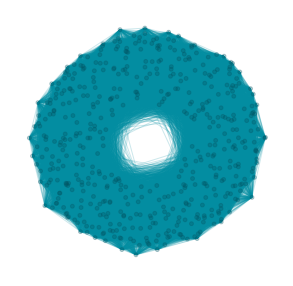

In [11]:
netviz_spri_fig, ax = plt.subplots(figsize = (5,5))

ax.set_xlim(-1.175,1.175)
ax.set_ylim(-1.175,1.175)

rng.plot_nx(G, ax=ax, pos = spring_layout)

## ring-score distribution

In [12]:
n_ensemble = 2**6
n_arg_points = 2**6

new_kwargs = {}
for k,v in kwargs.items():
    if kwargs[k] != config_dict['default'][k]:
        arg_name = k
    else:
        new_kwargs[k] = kwargs[k]

arg_list = np.linspace(0, 1, n_arg_points+1)[1:]

In [ ]:
N = 2**9

score = defaultdict(list)

t1 = time.time()
for arg in arg_list:
    t2 = time.time()
    print(arg, t2-t1)
    for _ in range(n_ensemble):
        G = rng.network_model(N = N, **new_kwargs, **{arg_name : arg})
        try:
            score[arg].append(rng.ring_score(G))
        except rng.DisconnectedGraphError:
            continue
        
t2 = time.time()
print(20*'-')
print(t2 - t1)

0.015625 0.0004868507385253906
0.03125 27.26620888710022
0.046875 168.2283809185028
0.0625 307.7646949291229
0.078125 466.7603089809418
0.09375 614.8079319000244
0.109375 777.2305591106415
0.125 961.581708908081
0.140625 1128.1253578662872
0.15625 1298.8459458351135
0.171875 1497.9998779296875
0.1875 1678.2795758247375
0.203125 1864.004154920578
0.21875 2058.1308648586273
0.234375 2256.0128698349
0.25 2454.8553791046143
0.265625 2671.307446718216
0.28125 2906.7945218086243
0.296875 3159.6292419433594
0.3125 3405.040692090988
0.328125 3647.591947078705
0.34375 3895.5778698921204
0.359375 4138.238173007965
0.375 4386.978230714798
0.390625 4635.144367933273
0.40625 4881.897585868835
0.421875 5151.250576972961
0.4375 5431.918637752533
0.453125 5688.962666988373
0.46875 5947.489799022675
0.484375 6207.918741941452
0.5 6476.87753200531
0.515625 6764.1762409210205
0.53125 7046.0660808086395
0.546875 7332.191707849503
0.5625 7618.8993809223175
0.578125 7909.099832773209
0.59375 8204.6735019683

In [ ]:
plot_df = pd.DataFrame(dtype = float)

for r, scores in score.items():
    tmp_df = pd.DataFrame([[r]*len(scores),scores])
    plot_df = pd.concat([plot_df, tmp_df.T], ignore_index = True)
    
plot_df.columns = (arg_name, 'score')

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
sns.lineplot(x = arg_name, y = "score", data = plot_df, ax=ax, size=14)
rng.ax_setup(ax)

plot_df.to_csv(f"/Users/markusyoussef/Desktop/ring_score_plots/scores_{arg_name}_N{N}.csv")
plt.savefig(f"/Users/markusyoussef/Desktop/ring_score_plots/scores_{arg_name}_N{N}.png")

---

In [12]:

N = builder.N
c = builder.coupling
beta = rate_to_beta(builder.rate)

r_list = np.linspace(0, 1, 11)[1:]

In [27]:
score = defaultdict(list)

t1 = time.time()
for r in r_list:
    print(r)
    for _ in range(n_ensemble):
        G = rng.network_model(N=N, r=r, beta=beta, c = builder.coupling)
        score[r].append(rng.ring_score(G))
        
t2 = time.time()
print(20*'-')
print(t2 - t1)

0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0
--------------------
103.40842390060425


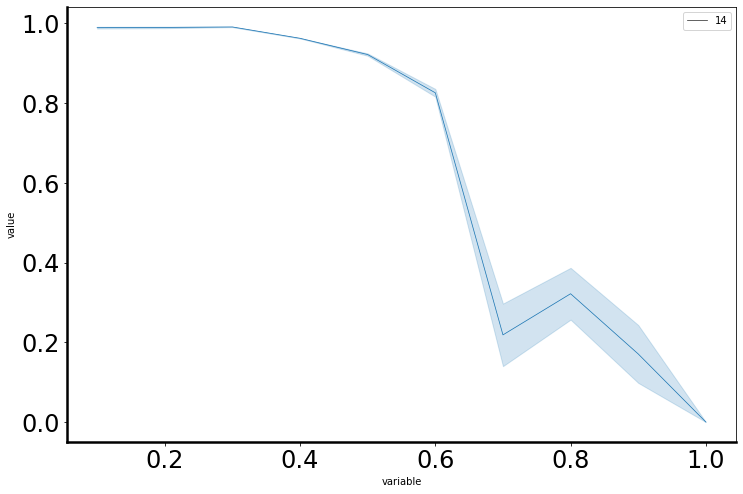

In [28]:
plot_df = pd.melt(pd.DataFrame(score))

fig, ax = plt.subplots(figsize = (12,8))
sns.lineplot(x = "variable", y = "value", data = plot_df, ax=ax, size=14)
rng.ax_setup(ax)
plt.savefig("/Users/markusyoussef/Desktop/test.png")

### Variing coupling

In [15]:
new_kwargs = {}

for k,v in kwargs.items():
    if kwargs[k] != config_dict['default'][k]:
        arg_name = k
    else:
        new_kwargs[k] = kwargs[k]

arg_list = np.linspace(0, 1, 11)[1:]

In [ ]:
score = defaultdict(list)

t1 = time.time()
for arg in arg_list:
    print(arg)
    for _ in range(n_ensemble):
        G = rng.network_model(N=N, **new_kwargs, **{arg_name : arg})
        score[r].append(rng.ring_score(G))
        
t2 = time.time()
print(20*'-')
print(t2 - t1)

0.1
0.2
0.30000000000000004
0.4


In [ ]:
G = rng.network_model(N=N, verbose = True, **new_kwargs, **{arg_name : arg})

In [27]:
n_ensemble = 2**4
N_list = [2**k for k in range(5, 9)]
r = builder.response
score = defaultdict(list)

t1 = time.time()
for N in N_list:
    print(N)
    for _ in range(n_ensemble):
        G = rng.network_model(N=N, c=c, r=r, beta=beta)
        score[N].append(rng.ring_score(G))
        
t2 = time.time()

print(t2 - t1)

19.147202968597412


In [28]:
plot_df = pd.melt(pd.DataFrame(score))

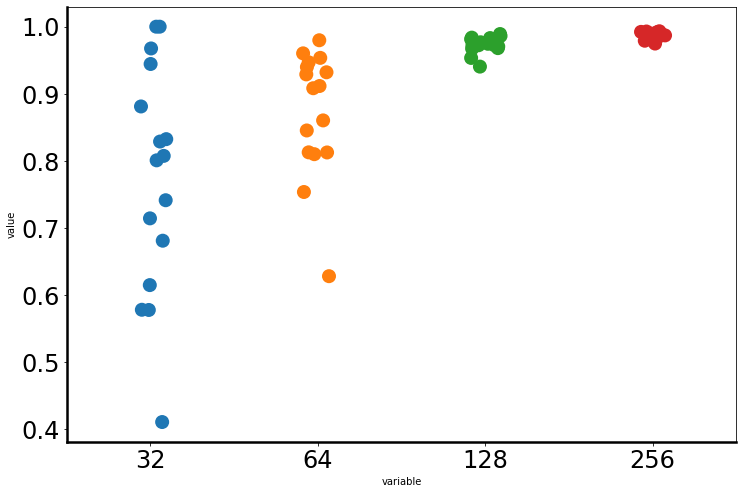

In [29]:
fig, ax = plt.subplots(figsize = (12,8))
sns.stripplot(x = "variable", y = "value", data = plot_df, ax=ax, size=14)
rng.ax_setup(ax)
plt.savefig("/Users/markusyoussef/Desktop/test.png")

## Clustering coefficient

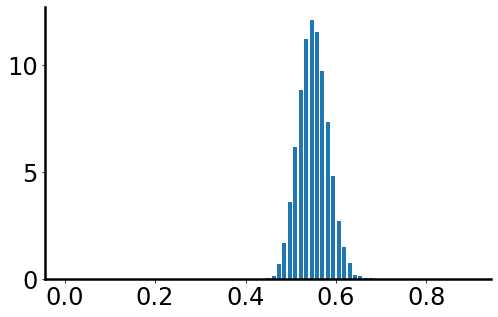

In [32]:
clust = []

for _ in range(2**6):
    G = rng.network_model(N=N, **config_dict[configuration])
    clust.extend(rng.clustering_coefficient(G))

clust_fig, ax = plt.subplots(figsize = (8,5))

ax.hist(clust, 
        bins=75, range=(0, 0.9), 
        rwidth = 0.75, density = True);

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

rng.ax_setup(ax)

## Degree distribution

In [33]:
def expected_conditional_similarity(theta, rate, a):
    if np.isclose(rate, 0, atol=1e-7):
        return a
    
    if np.isclose(rate, np.inf):
        A = 1/(2*np.pi*a)
        B = A*np.pi
        C = B - 1
        return np.clip(np.abs(A*theta - B) - C, 0, 1)
    
    if theta < np.pi:
        if theta <= 2*np.pi*a:
            norm = 1 / (1 - np.exp(-2*np.pi*rate)) / (2*a*np.pi*rate)
            
            theta_term = -theta*rate * (1 - np.exp(-2*np.pi*rate))
            
            term1  = -2*np.exp(-rate*theta) + 1
            term21 =  np.exp(-rate*theta)*(np.exp(-2*a*np.pi*rate) + np.exp((2*a*np.pi - 2*np.pi)*rate))
            term22 = -np.exp(-2*np.pi*rate)
            
            return norm*(term1 + term21 + term22 + theta_term) + 1
        else:
            theta_term = np.exp(-rate*theta) / (1 - np.exp(-2*np.pi*rate))
            alpha_term = (np.cosh(-rate*2*np.pi*a) - 1) / (a*np.pi*rate)
            return theta_term * alpha_term
        
    else:
        norm = 2*rate*np.exp(-rate*theta) / (1 - np.exp(-2*np.pi*rate))
        
        def undef_int(t):
            return (np.exp(np.pi*rate)*(np.cosh((np.pi - t)*rate) + (-2*a*np.pi + t)*rate*np.sinh((np.pi - t)*rate)))/(2*a*np.pi*rate**2)
        
        if 2*np.pi - theta <= 2*np.pi*a:
            term1 = (-1 + np.cosh((2*np.pi - theta)*rate) + (2*(-1 + a)*np.pi + theta)*rate*np.sinh((2*np.pi - theta)*rate))/(2*a*np.pi*rate**2)
            term2 = undef_int(2*np.pi*a) - undef_int(2*np.pi - theta)
            return norm*term1 + norm*term2
        else:
            return norm*(np.sinh(a*np.pi*rate)**2)/(a*np.pi*rate**2)

In [35]:
c = builder.coupling
r = builder.response
rate = builder.rate

degs_exp = [p for theta in pos for p in np.random.binomial(N-1, c*expected_conditional_similarity(theta=theta, rate=rate, a=r), size=2**10)]

In [36]:
degs_exp, freqs_exp = zip(*Counter(degs_exp).items())
freqs_exp = np.array(freqs_exp) / sum(freqs_exp)

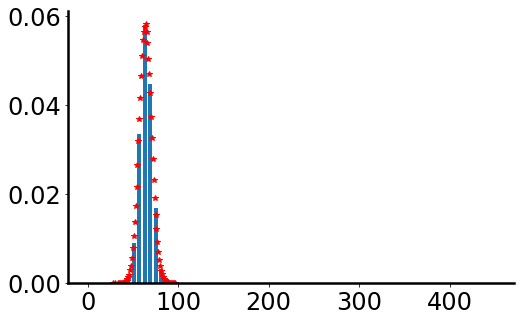

In [37]:
degs = []

for _ in range(2**6):
    G = rng.network_model(N=N, c=c, r=r, beta=beta)
    degs.extend([deg for n, deg in nx.degree(G)])

degs_obs, freqs_obs = zip(*Counter(degs).items())
freqs_obs = np.array(freqs_obs) / sum(freqs_obs)

deg_fig, ax = plt.subplots(figsize = (8,5))

ax.hist(degs, 
        bins = 75, range = (0, 450),
        rwidth = 0.75, density = True);

ax.plot(degs_exp, freqs_exp, '*r')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#ax.set_xlabel('degree', fontsize=24)
#ax.set_ylabel('frequency', fontsize=18)

rng.ax_setup(ax)

## Save data

In [98]:
fig_dir = Path("/Users/markusyoussef/Desktop/fig3/")

fig_func.savefig(fig_dir / f"{configuration}_interactionFunction.png")
fig_func.savefig(fig_dir / f"{configuration}_interactionFunction.pdf")

#netviz_circ_fig.savefig(f"/Users/dottolab/Desktop/fig3/{configuration}_network_circular.png")
#netviz_circ_fig.savefig(f"/Users/dottolab/Desktop/fig3/{configuration}_network_circular.pdf")

netviz_spri_fig.savefig(fig_dir / f"{configuration}_network_spring.png")
netviz_spri_fig.savefig(fig_dir / f"{configuration}_network_spring.pdf")

clust_fig.savefig(fig_dir / f"{configuration}_clustering.png")
clust_fig.savefig(fig_dir / f"{configuration}_clustering.pdf")

deg_fig.savefig(fig_dir / f"{configuration}_degree.png")
deg_fig.savefig(fig_dir / f"{configuration}_degree.pdf")